# Load the datasets and imports

<font color ='red'>Note:</font> We are loading a big dataset with 2985217 rows and 58 columns. It requires at least 2GB of free RAM to load.

In [9]:
# imports here:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load datasets here:
train_data = pd.read_csv('C:/Users/Yao/Documents/GitHub/data_mining_group_project/input/train_2016_v2.csv')
data = pd.read_csv('C:/Users/Yao/Documents/GitHub/data_mining_group_project/input/properties_2016.csv', low_memory=False)
data = pd.merge(data, train_data, how='left', on='parcelid')
data['transactiondate'] = pd.to_datetime(data['transactiondate'])

'The dataset has %d rows and %d columns' % data.shape

'The dataset has 2985342 rows and 60 columns'

# Business Understanding
<b>10 points</b>

<i>
<b>Description:</b><br/>
Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.
</i>

<b>Answer:</b><br/>
This is a dataset from a Kaggle competion: "Zillow Prize: Zillow’s Home Value Prediction (Zestimate)". It has a submittion deadline in about 3 months and $1,200,000 Prize Money.

Zillow is one of the leading real estate and rental marketplace platforms. They have a model which estimates a property price based on the property description and this call this estimation Zestimate. As with every real world model, Zestimate has some error in the prediction. In this competition, Zillow is asking us to predict the log-error between their Zestimate and the actual sale price, given all the features of a home. The log error is defined as:

$logerror=log(Zestimate)−log(SalePrice)$

where logerror < 0 will represent Zestimate been lower than the actual sell price and logerror > 0 represent Zestimate has estimated the property to cost more than the price it got sold.

We are provided with a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016. The dataset contains:
- ID for the listing 
- 57 variables describing the property as square foots
number of bedrooms
- two result variables: logerror and transaction date

Train and test datasets:
- train data with <b>90275 rows</b> (containing logerror and transaction date) has all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016.
- test data with <b>2895067 rows</b> in the public leaderboard has the rest of the transactions between October 15 and December 31, 2016.

The competition comes down to: <b>can we build a model that estimates better than Zillow's?</b>

To measure the effectiveness of a good prediction algorithm we will first use cross valiadated splitting of the train dataset to train/valid/test and estimate our test prediction error. A final prediction error will be estimated by kaggle when we submit our predictions.

This notebook will be used by us as documentation for the dataset. Here is what we do:
- Clean the dataset. We are are looking at every variable individually in order to remove high outliers and deal with missing values
- Create a table with all variable names, attribute types, range and description. We will use this table as a refference
- Get some statistical summary of the dataset
- Visualize Attributes in order to get familiar with ranges, distibutions
- Visualize relationships between attributes
- Identify and explain interesting relationships between features and the class you are trying to predict
- Add New Features
- And more..

In [11]:
# code here

# Data Meaning Type
<b>10 points</b>

<i>
<b>Description:</b><br/>
Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.
</i>

<b>Answer:</b><br/>
...
![data_types](../img/data_types.png)

In [12]:
from IPython.display import display, HTML

# data type should be one of:
# 

variables_description = [
['airconditioningtypeid', 'nominal', 'TBD', 'Type of cooling system present in the home (if any)']
,['architecturalstyletypeid', 'nominal', 'TBD', 'Architectural style of the home (i.e. ranch, colonial, split-level, etc…)']
,['basementsqft', 'ratio', 'TBD', 'Finished living area below or partially below ground level']
,['bathroomcnt', 'ordinal', 'TBD', 'Number of bathrooms in home including fractional bathrooms']
,['bedroomcnt', 'ordinal', 'TBD', 'Number of bedrooms in home']
,['buildingqualitytypeid', 'ordinal', 'TBD', 'Overall assessment of condition of the building from best (lowest) to worst (highest)']
,['buildingclasstypeid', 'nominal', 'TBD', 'The building framing type (steel frame, wood frame, concrete/brick)']
,['calculatedbathnbr', 'ordinal', 'TBD', 'Number of bathrooms in home including fractional bathroom']
,['decktypeid', 'nominal', 'TBD', 'Type of deck (if any) present on parcel']
,['threequarterbathnbr', 'ordinal', 'TBD', 'Number of 3/4 bathrooms in house (shower + sink + toilet)']
,['finishedfloor1squarefeet', 'ratio', 'TBD', 'Size of the finished living area on the first (entry) floor of the home']
,['calculatedfinishedsquarefeet', 'ratio', 'TBD', 'Calculated total finished living area of the home']
,['finishedsquarefeet6', 'ratio', 'TBD', 'Base unfinished and finished area']
,['finishedsquarefeet12', 'ratio', 'TBD', 'Finished living area']
,['finishedsquarefeet13', 'ratio', 'TBD', 'Perimeter living area']
,['finishedsquarefeet15', 'ratio', 'TBD', 'Total area']
,['finishedsquarefeet50', 'ratio', 'TBD', 'Size of the finished living area on the first (entry) floor of the home']
,['fips', 'nominal', 'TBD', 'Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details']
,['fireplacecnt', 'ordinal', 'TBD', 'Number of fireplaces in a home (if any)']
,['fireplaceflag', 'ordinal', 'TBD', 'Is a fireplace present in this home']
,['fullbathcnt', 'ordinal', 'TBD', 'Number of full bathrooms (sink, shower + bathtub, and toilet) present in home']
,['garagecarcnt', 'ordinal', 'TBD', 'Total number of garages on the lot including an attached garage']
,['garagetotalsqft', 'ratio', 'TBD', 'Total number of square feet of all garages on lot including an attached garage']
,['hashottuborspa', 'ordinal', 'TBD', 'Does the home have a hot tub or spa']
,['heatingorsystemtypeid', 'nominal', 'TBD', 'Type of home heating system']
,['latitude', 'interval', 'TBD', 'Latitude of the middle of the parcel multiplied by 10e6']
,['longitude', 'interval', 'TBD', 'Longitude of the middle of the parcel multiplied by 10e6']
,['lotsizesquarefeet', 'ratio', 'TBD', 'Area of the lot in square feet']
,['numberofstories', 'ordinal', 'TBD', 'Number of stories or levels the home has']
,['parcelid', 'nominal', 'TBD', 'Unique identifier for parcels (lots)']
,['poolcnt', 'ordinal', 'TBD', 'Number of pools on the lot (if any)']
,['poolsizesum', 'ratio', 'TBD', 'Total square footage of all pools on property']
,['pooltypeid10', 'nominal', 'TBD', 'Spa or Hot Tub']
,['pooltypeid2', 'nominal', 'TBD', 'Pool with Spa/Hot Tub']
,['pooltypeid7', 'nominal', 'TBD', 'Pool without hot tub']
,['propertycountylandusecode', 'nominal', 'TBD', 'County land use code i.e. it\'s zoning at the county level']
,['propertylandusetypeid', 'nominal', 'TBD', 'Type of land use the property is zoned for']
,['propertyzoningdesc', 'nominal', 'TBD', 'Description of the allowed land uses (zoning) for that property']
,['rawcensustractandblock', 'nominal', 'TBD', 'Census tract and block ID combined - also contains blockgroup assignment by extension']
,['censustractandblock', 'nominal', 'TBD', 'Census tract and block ID combined - also contains blockgroup assignment by extension']
,['regionidcounty', 'nominal', 'TBD', 'County in which the property is located']
,['regionidcity', 'nominal', 'TBD', 'City in which the property is located (if any)']
,['regionidzip', 'nominal', 'TBD', 'Zip code in which the property is located']
,['regionidneighborhood', 'nominal', 'TBD', 'Neighborhood in which the property is located']
,['roomcnt', 'ordinal', 'TBD', 'Total number of rooms in the principal residence']
,['storytypeid', 'nominal', 'TBD', 'Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.). See tab for details.']
,['typeconstructiontypeid', 'nominal', 'TBD', 'What type of construction material was used to construct the home']
,['unitcnt', 'ordinal', 'TBD', 'Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)']
,['yardbuildingsqft17', 'interval', 'TBD', 'Patio in yard']
,['yardbuildingsqft26', 'interval', 'TBD', 'Storage shed/building in yard']
,['yearbuilt', 'interval', 'TBD', 'The Year the principal residence was built']
,['taxvaluedollarcnt', 'ratio', 'TBD', 'The total tax assessed value of the parcel']
,['structuretaxvaluedollarcnt', 'ratio', 'TBD', 'The assessed value of the built structure on the parcel']
,['landtaxvaluedollarcnt', 'ratio', 'TBD', 'The assessed value of the land area of the parcel']
,['taxamount', 'ratio', 'TBD', 'The total property tax assessed for that assessment year']
,['assessmentyear', 'interval', 'TBD', 'The year of the property tax assessment']
,['taxdelinquencyflag', 'nominal', 'TBD', 'Property taxes for this parcel are past due as of 2015']
,['taxdelinquencyyear', 'interval', 'TBD', 'Year']
]
variables = pd.DataFrame(variables_description, columns=['name', 'type', 'scale','description'])
variables = variables.set_index('name')
rows = ['<tr><th>Variable</th><th>Type</th><th>Scale</th><th>Description</th></tr>']
for row in variables_description:
    # add scale if TBD
    if row[2] == 'TBD':
        vname, vtype = row[:2]
        if vtype in ['nominal', 'ordinal']:

            uniques = data[vname].unique()
            uniques = list(uniques.astype(str))
            if len(uniques) < 10:
                
                row[2] = '[%s]' % ', '.join(uniques)
            else:
                row[2] = '[%s]' % (', '.join(uniques[:5]) + ', ... (%d More)' % len(uniques))

        if vtype in ['ratio', 'interval']:
            row[2] = '(%d, %d)' % (data[vname].min(), data[vname].max())
        
    rows.append('<tr ><td>%s</td><td>%s</td><td>%s</td><td>%s</td></tr>' % tuple(row))
HTML('<table>%s</table>' % ''.join(rows))

Variable,Type,Scale,Description
airconditioningtypeid,nominal,"[nan, 1.0, 13.0, 5.0, 11.0, 9.0, 12.0, 3.0]",Type of cooling system present in the home (if any)
architecturalstyletypeid,nominal,"[nan, 7.0, 21.0, 8.0, 2.0, 3.0, 5.0, 10.0, 27.0]","Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
basementsqft,ratio,"(20, 8516)",Finished living area below or partially below ground level
bathroomcnt,ordinal,"[0.0, 2.0, 4.0, 3.0, 1.0, ... (38 More)]",Number of bathrooms in home including fractional bathrooms
bedroomcnt,ordinal,"[0.0, 4.0, 5.0, 2.0, 3.0, ... (22 More)]",Number of bedrooms in home
buildingqualitytypeid,ordinal,"[nan, 7.0, 4.0, 10.0, 1.0, ... (13 More)]",Overall assessment of condition of the building from best (lowest) to worst (highest)
buildingclasstypeid,nominal,"[nan, 3.0, 4.0, 5.0, 2.0, 1.0]","The building framing type (steel frame, wood frame, concrete/brick)"
calculatedbathnbr,ordinal,"[nan, 2.0, 4.0, 3.0, 1.0, ... (35 More)]",Number of bathrooms in home including fractional bathroom
decktypeid,nominal,"[nan, 66.0]",Type of deck (if any) present on parcel
threequarterbathnbr,ordinal,"[nan, 1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 7.0]",Number of 3/4 bathrooms in house (shower + sink + toilet)


# Data Quality
<b>15 points</b>

<i>
<b>Description:</b><br/>
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.
</i>

<b>Answer:</b><br/>
...

## Examining Distribution of missing values
It looks like there are obsorvations with most of variables missing.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


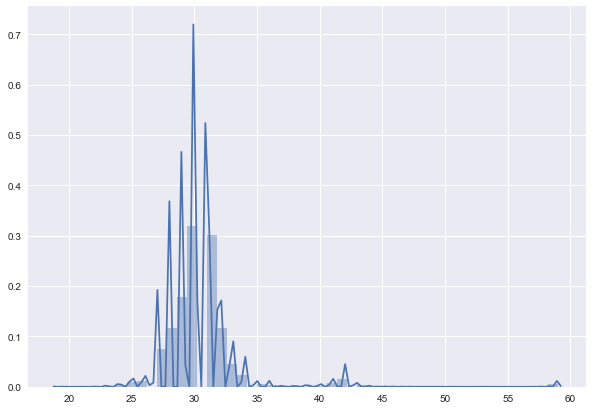

In [13]:
plt.rcParams['figure.figsize'] = [10, 7]

number_missing_per_row = data.isnull().sum(axis=1)
sns.distplot(number_missing_per_row);

### All obsorvations have a value for parcelid

In [14]:
data['parcelid'].isnull().sum()

0

### 0.38 percent of the data has only parcelid present and all other variables missing
We remove those obsorvations because they don't present any value

In [15]:
print(len(number_missing_per_row[number_missing_per_row >= 57]) / len(data) * 100)
data = data[number_missing_per_row < 57]

0.38310518526855547


### Missing values table:

In [16]:
missing_values = data.isnull().sum().reset_index()
missing_values.columns = ['Variable Name', 'Number Missing Values']
missing_values['Precent Missing'] = missing_values['Number Missing Values'] / len(data) * 100 
missing_values['Precent Missing'] = missing_values['Precent Missing'].replace(np.inf, 0)
missing_values

,Variable Name,Number Missing Values,Precent Missing
0,parcelid,0,0.000000
1,airconditioningtypeid,2162353,72.710897
2,architecturalstyletypeid,2967843,99.796160
3,basementsqft,2972277,99.945257
4,bathroomcnt,25,0.000841
5,bedroomcnt,13,0.000437
6,buildingclasstypeid,2961276,99.575339
7,buildingqualitytypeid,1035337,34.814058
8,calculatedbathnbr,117481,3.950395
9,decktypeid,2956809,99.425133


## Examining variables for missing values and outliers individually

In [17]:
def fix_outliers(data, column):
    mean = data[column].mean()
    std = data[column].std()
    max_value = mean + std * 5
    min_value = mean - std * 5
    
    if data[column].max() < max_value and data[column].min() > min_value:
        print('No outliers found')
        return
    
    print('Outliers found!')
    
    f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=[15, 7])
    
    sns.boxplot(data[column].dropna(), ax=ax0).set_title('Before');
    sns.distplot(data[column].dropna(), ax=ax2).set_title('Before');

    data.loc[data[column] > max_value, column] = max_value
    data.loc[data[column] < min_value, column] = min_value
    
    sns.boxplot(data[column].dropna(), ax=ax1).set_title('After');
    sns.distplot(data[column].dropna(), ax=ax3).set_title('After');

### Variable: fips - Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details
Has datatype: nominal with values [6037.0, 6059.0, 6111.0] and no missing values

I fix the column datatype to integer.

In [18]:
data['fips'] = data['fips'].astype(np.int32)

### Variable: fireplacecnt - Number of fireplaces in a home (if any)
Has datatype: ordinal and 89.486882 percent of values missing 

In this dataset, missing value represents 0 fireplaces. We replace all missing values with zero and change the column datatype to integer.

In [19]:
print('Before', data['fireplacecnt'].unique())
data['fireplacecnt'] = data['fireplacecnt'].fillna(0).astype(np.int32)
print('After', data['fireplacecnt'].unique())

Before [ nan   3.   1.   2.   4.   9.   5.   7.   6.   8.]
After [0 3 1 2 4 9 5 7 6 8]


### Variable: fullbathcnt - Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
Has datatype: ordinal and 3.95 percent of values missing 

We first replace its missing values with the valeues of bathroomcnt which is a similare measure. After that we have 25 obsorvations missing and we replace them with 0.

In [20]:
print('Before', data['fullbathcnt'].unique())
missing_fullbathcnt = data['fullbathcnt'].isnull()
data.loc[missing_fullbathcnt, 'fullbathcnt'] = data['bathroomcnt'][missing_fullbathcnt].fillna(0)
print('After', data['fullbathcnt'].unique())

Before [ nan   2.   4.   3.   1.   5.   7.   6.  10.   8.   9.  12.  11.  13.  14.
  20.  19.  15.  18.  16.  17.]
After [  0.     2.     4.     3.     1.     5.     7.     6.    10.     8.     9.
  12.    11.     7.5    2.5    4.5    1.5   13.    14.    20.     3.5   19.
   5.5   15.    18.    16.     1.75   6.5   17.     0.5    8.5 ]


### Variable: garagecarcnt - Total number of garages on the lot including an attached garage

Has datatype: ordinal and 70.298173 percent of values missing 

We assume a missing value will represent no garages and replace all missing values with zero.

In [21]:
data['garagecarcnt'] = data['garagecarcnt'].fillna(0).astype(np.int32)
print(data['garagecarcnt'].unique())

[ 0  2  4  1  3  5  7  6  8  9 12 11 10 13 14 15 25 21 18 17 24 19 16 20]


### Variable: garagetotalsqft - Total number of garages on the lot including an attached garage

Has datatype: ratio and 70.298173 percent of values missing 

We will first replace missing values where garagecarcnt is 0 with 0. 
We replace all outliers with a maximum value of (mean + 6 * std)

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


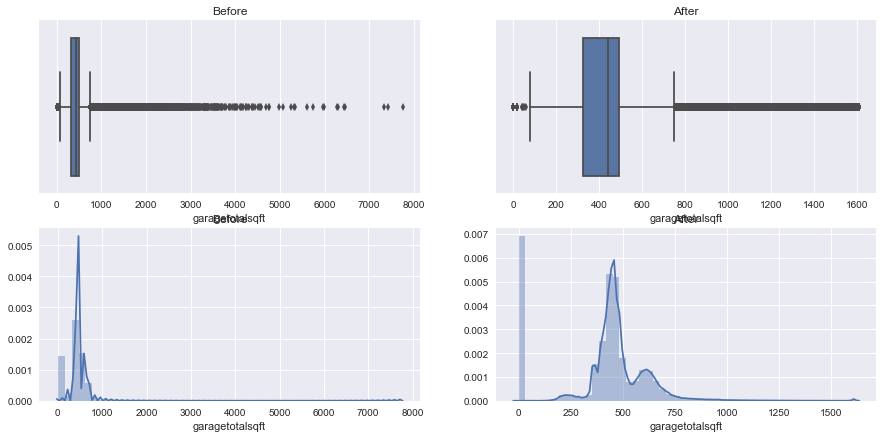

In [22]:
fix_outliers(data, 'garagetotalsqft')

data.loc[data['garagecarcnt'] == 0, 'garagetotalsqft'] = 0
assert data['garagetotalsqft'].isnull().sum() == 0

### Variable: hashottuborspa - Does the home have a hot tub or spa

Has datatype: ordinal and 97.679250 percent of values missing 

In this dataset missing values represent doesn't have a hot tub or spa. I will replace all missing values with 0 and all True values with 1.

In [23]:
print('Before', data['hashottuborspa'].unique())
data['hashottuborspa'] = data['hashottuborspa'].fillna(0).replace('True', 1).astype(np.int32)
print('After', data['hashottuborspa'].unique())

Before [nan True]
After [0 1]


### Variable: heatingorsystemtypeid - Type of home heating system

Has datatype: nominal and 39.255728 percent of values missing 

We replace all missing values with 0 which will represent a missing heating system type id.

In [24]:
print('Before', data['heatingorsystemtypeid'].unique())
data['heatingorsystemtypeid'] = data['heatingorsystemtypeid'].fillna(0).astype(np.int32)
print('After', data['heatingorsystemtypeid'].unique())

Before [ nan   2.   7.  20.   6.  13.  18.  24.  12.  10.   1.  14.  21.  11.  19.]
After [ 0  2  7 20  6 13 18 24 12 10  1 14 21 11 19]


### Variables: latitude and longitude

Has datatype: interval and no missing values.

### Variable: lotsizesquarefeet - Area of the lot in square feet

Has datatype: ratio and 8.9 percent of values missing 

We replace all missing values with 0 which will represent no lot.
We replace all outliers with a maximum value of (mean + 6 * std)

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


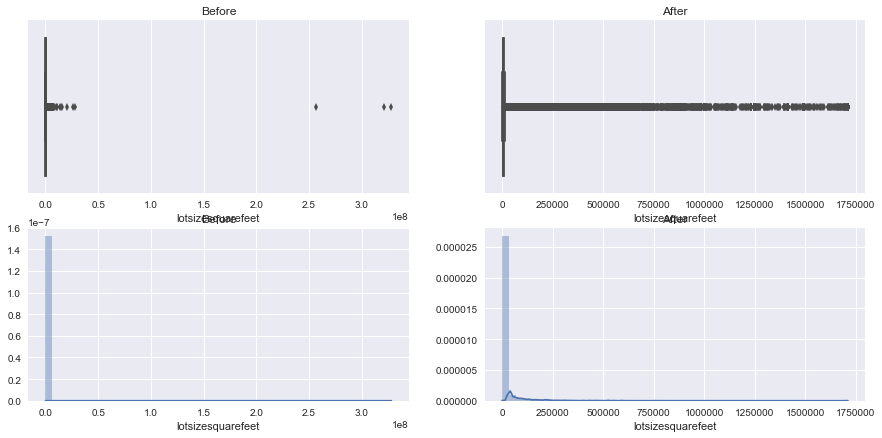

In [25]:
fix_outliers(data, 'lotsizesquarefeet')
data['lotsizesquarefeet'] = data['lotsizesquarefeet'].fillna(0)

### Variable: poolcnt - Number of pools on the lot (if any)

Has datatype: ordinal and 82.6 percent of values missing 

We replace all missing values with 0 which will represent no pools.

In [26]:
print('Before', data['poolcnt'].unique())
data['poolcnt'] = data['poolcnt'].fillna(0).astype(np.int32)
print('After', data['poolcnt'].unique())

Before [ nan   1.]
After [0 1]


### Variable: poolsizesum - Total square footage of all pools on property

Has datatype: ratio and 99 percent of values missing 

We replace all missing values with 0 if number of pools is 0 or with the average poolsizesum otherwise.

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


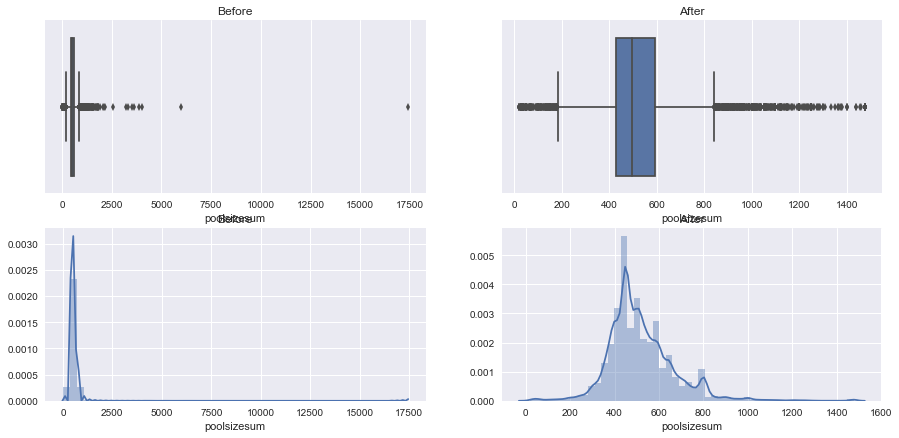

In [27]:
fix_outliers(data, 'poolsizesum')

data.loc[data['poolsizesum'].isnull(), 'poolsizesum'] = int(data['poolsizesum'].mean())
data.loc[data['poolcnt'] == 0, 'poolsizesum'] = 0

### Variable: pooltypeid10 - Spa or Hot Tub

Has datatype: nominal and 98.8 percent of values missing 

We replace all missing values with 0 which will represent no Spa or Hot Tub.

In [28]:
print('Before', data['pooltypeid10'].unique())
data['pooltypeid10'] = data['pooltypeid10'].fillna(0).astype(np.int32)
print('After', data['pooltypeid10'].unique())

Before [ nan   1.]
After [0 1]


### Variable: yardbuildingsqft17 - sq feet of patio in yard

Has datatype: interval and 97.29 percent of values missing

We replace all missing values with 0 representing no patio

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


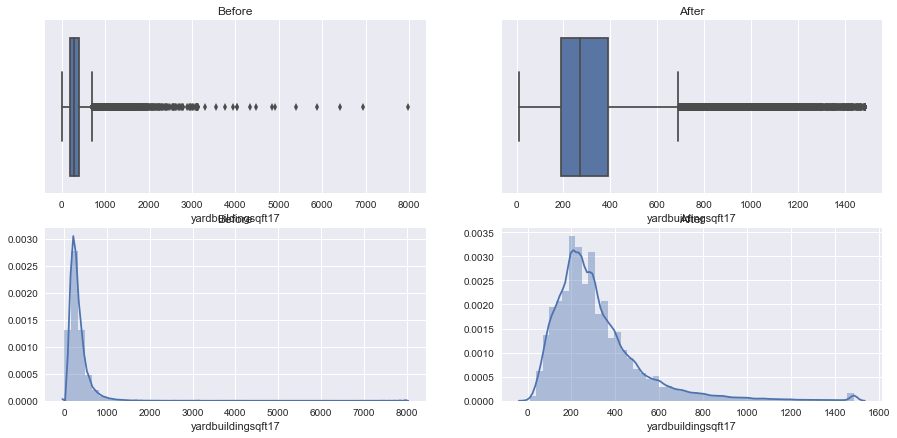

In [29]:
fix_outliers(data, 'yardbuildingsqft17')

data['yardbuildingsqft17'] = data['yardbuildingsqft17'].fillna(0).astype(np.int32)

### Variable: yardbuildingsqft26 - storage shed/building in yard

Has datatype: interval and 99.91 percent of values missing 

We replace all missing values with 0 which will represent no (square ft) storage shed or building in the yard.

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


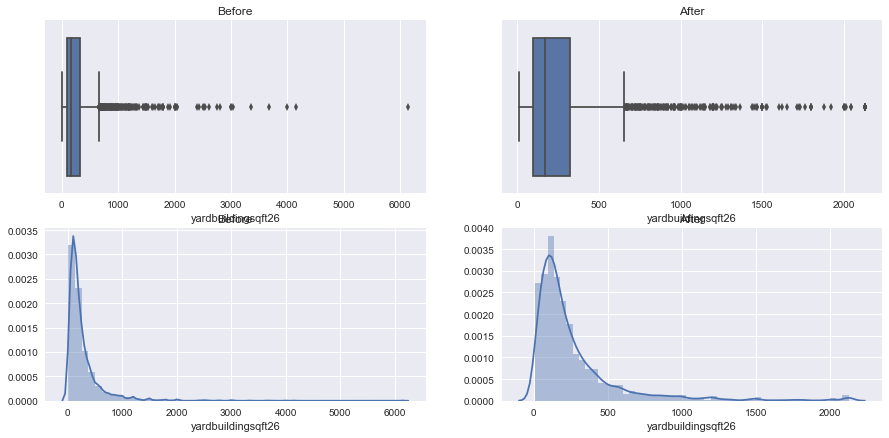

In [30]:
fix_outliers(data, 'yardbuildingsqft26')

data['yardbuildingsqft26'] = data['yardbuildingsqft26'].fillna(0)

### Variable: yearbuilt - The Year the residence was built

Has datatype: interval and 1.63 percent of values missing 

We replace all missing values with the median year built of 1963 until we have a better method to impute

In [31]:
print('Before', data['yearbuilt'].unique())
medYear = data['yearbuilt'].median()
data['yearbuilt'] = data['yearbuilt'].fillna(medYear).astype(np.int32)
print('After', data['yearbuilt'].unique())

Before [   nan  1948.  1947.  1943.  1946.  1978.  1958.  1949.  1956.  2005.
  1957.  1939.  1926.  1938.  1972.  1955.  2004.  2011.  1929.  2010.
  1934.  1925.  1936.  1920.  1937.  1962.  1927.  1908.  1909.  1959.
  1916.  1993.  1960.  1919.  1942.  1940.  1924.  2006.  1950.  1923.
  1912.  1935.  1953.  1985.  1944.  1951.  1973.  2003.  1992.  1952.
  1969.  1921.  1981.  2000.  1961.  1989.  1970.  2009.  1984.  1968.
  1999.  1964.  1991.  1983.  1982.  1977.  1995.  1994.  1986.  1965.
  1974.  1980.  1987.  1967.  1990.  2002.  1963.  1971.  1975.  1997.
  1976.  1979.  1988.  1998.  2013.  2014.  2012.  1932.  1966.  1954.
  1904.  1928.  1930.  1941.  1890.  2001.  1996.  2008.  1913.  1933.
  2007.  1931.  1945.  1922.  1910.  1918.  1914.  1911.  1907.  1915.
  1905.  1902.  1901.  1903.  1917.  1906.  1895.  1889.  1885.  1887.
  1900.  1898.  1896.  1899.  2015.  1893.  1894.  1886.  1897.  1862.
  1880.  1891.  1888.  1808.  1855.  1892.  1825.  1884.  1882.  1883.

### Variable: numberofstories - number of stories or levels the home has

Has datatype: ordinal and 77.06 percent of values missing

We replace all missing values with 1 after removing all outliers to represent a single story home.

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


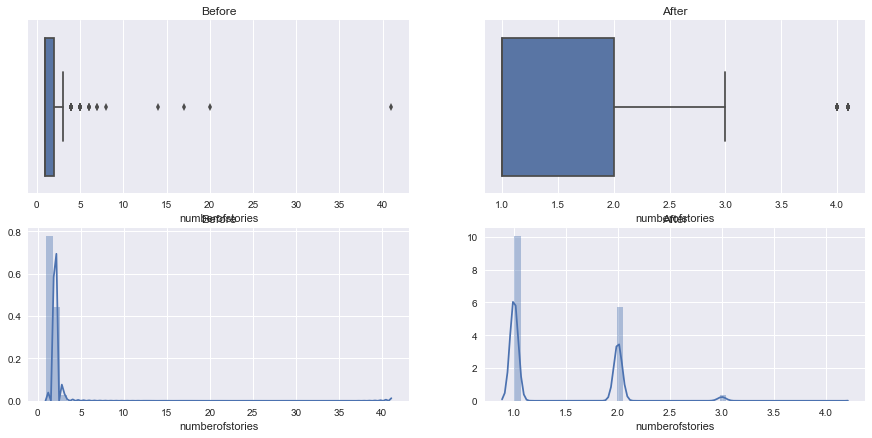

In [32]:
fix_outliers(data, 'numberofstories')

data['numberofstories'] = data['numberofstories'].fillna(1)

### Variable: fireplaceflag - does the home have a fireplace

Has datatype: ordinal and 99.82 percent of values missing

With 99% missing values, we decided to delete the variable.

In [33]:
del data['fireplaceflag']

### Variable: structuretaxvaluedollarcnt - the assessed value of the building

Has datatype: ratio and 1.46 percent of values missing

We replace all missing values with the median assessed building tax

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Before [     nan  650756.  571346. ...,  409940.  463704.  437765.]
After [122590 650756 571346 ..., 409940 463704 437765]


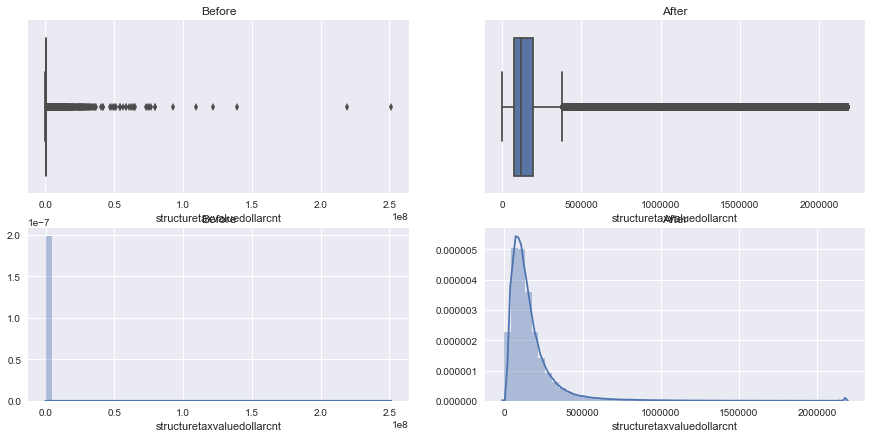

In [34]:
fix_outliers(data, 'structuretaxvaluedollarcnt')

print('Before', data['structuretaxvaluedollarcnt'].unique())
medTax = np.nanmedian(data['structuretaxvaluedollarcnt'])
#print(medTax)
data['structuretaxvaluedollarcnt'] = data['structuretaxvaluedollarcnt'].fillna(medTax).astype(np.int32)
print('After', data['structuretaxvaluedollarcnt'].unique())

### Variable: taxvaluedollarcnt - total tax 

Has datatype: ratio and 1.04 percent of values missing

We replace all missing values with the median total tax amount

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Before [  9.00000000e+00   2.75160000e+04   1.41338700e+06 ...,   4.70248000e+05
   6.43794000e+05   5.30550000e+05]
After [  9.00000000e+00   2.75160000e+04   1.41338700e+06 ...,   4.70248000e+05
   6.43794000e+05   5.30550000e+05]


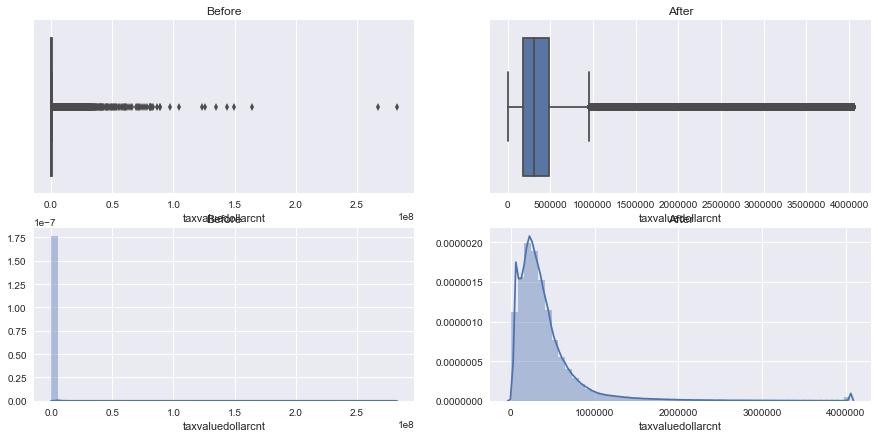

In [35]:
fix_outliers(data, 'taxvaluedollarcnt')

print('Before', data['taxvaluedollarcnt'].unique())
medTax = np.nanmedian(data['taxvaluedollarcnt'])
data['taxvaluedollarcnt'] = data['taxvaluedollarcnt'].fillna(medTax)
print('After', data['taxvaluedollarcnt'].unique())


### Variable: assessmentyear - year of the property tax assessment

Has datatype: interval and has 2 values missing

We replace the missing values with the latest tax year which also happens to be the median tax year.

In [36]:
print('Before', data['assessmentyear'].unique())
medAssessmentYear = np.nanmedian(data['assessmentyear'])
data['assessmentyear'] = data['assessmentyear'].fillna(medAssessmentYear).astype(np.int32)
print('After', data['assessmentyear'].unique())

Before [ 2015.  2014.  2003.  2012.  2001.  2011.  2013.  2016.  2010.    nan
  2004.  2005.  2002.  2000.  2009.]
After [2015 2014 2003 2012 2001 2011 2013 2016 2010 2004 2005 2002 2000 2009]


### Variable: landtaxvaluedollarcnt - the assessed value of the land

Has datatype: ratio and 1.89 percent of values missing

We replace all missing values with the median assessed land values

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


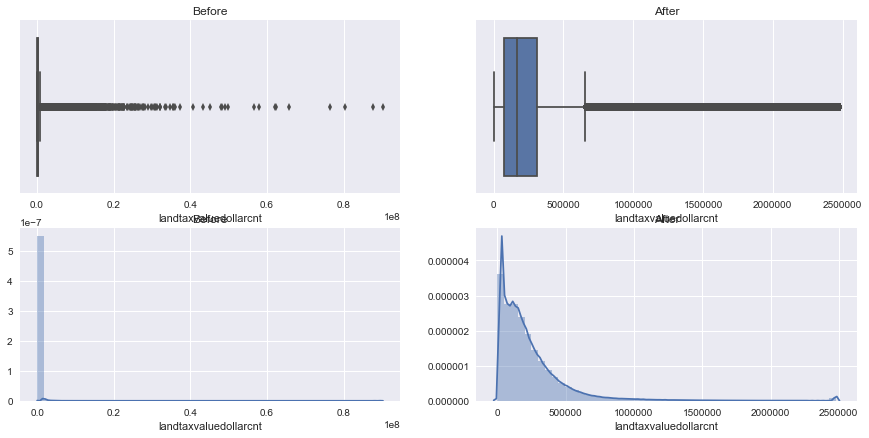

In [37]:
fix_outliers(data, 'landtaxvaluedollarcnt')
medLand = np.nanmedian(data['landtaxvaluedollarcnt'])
data['landtaxvaluedollarcnt'] = data['landtaxvaluedollarcnt'].fillna(medLand).astype(np.int32)


### Variable: taxamount - property tax for the assessment year

Has datatype: ratio and 0.66 percent of values missing

We replace all missing values with the median property taxes for the assessment year

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


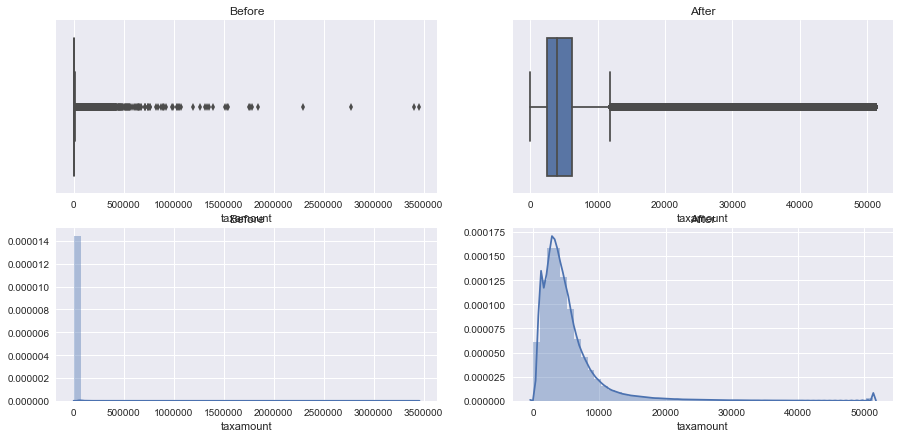

In [38]:
fix_outliers(data, 'taxamount')

medTax = np.nanmedian(data['taxamount'])
data['taxamount'] = data['taxamount'].fillna(medTax)

### Variable: taxdelinquencyflag - property taxes from 2015 that are past due

Has datatype: nominal and 98.10 percent of values missing

We replace all missing values with 0 representing no past due property taxes and all Y values with 1 representing that there are past due property taxes

In [39]:
print('Before', data['taxdelinquencyflag'].unique())
data['taxdelinquencyflag'] = data['taxdelinquencyflag'].fillna(0).replace('Y', 1).astype(np.int32)
print('After', data['taxdelinquencyflag'].unique())

Before [nan 'Y']
After [0 1]


### Variable: taxdelinquencyyear - years of deliquency

Has datatype: interval and 98.10 percent of values missing

We replace all missing values with 0 representing no years of property tax deliquencies

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


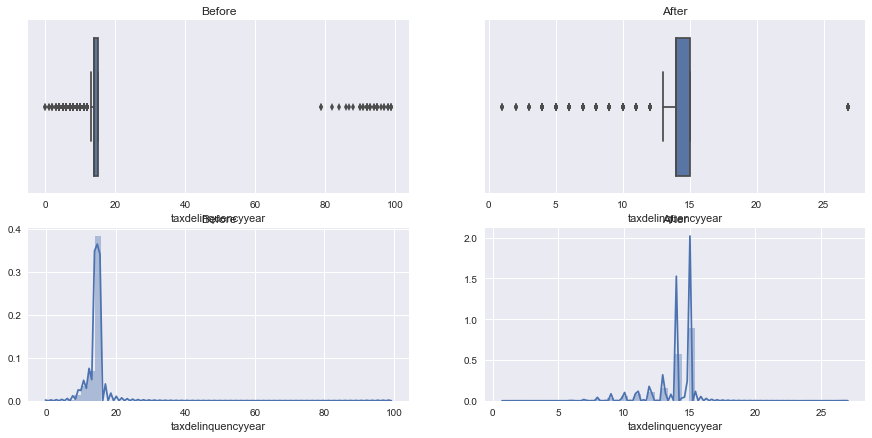

In [40]:
fix_outliers(data, 'taxdelinquencyyear')

data['taxdelinquencyyear'] = data['taxdelinquencyyear'].fillna(0)

### Variable: censustractandblock - census tract and census block ID

Has datatype: nominal and 2.14 percent of values missing

With such a small amount of missing values, we decided to replace them with the median.  A better approach in the future could be taking into account zip code and then median for the missing values.

In [41]:
print('Before', data['censustractandblock'].unique())
data['censustractandblock'] = data['censustractandblock'].fillna(data['censustractandblock'].median()).astype(np.int32)
print('After', data['censustractandblock'].unique())

Before [             nan   6.11100100e+13   6.11100090e+13 ...,   6.05909924e+13
   6.05906264e+13   6.03790121e+13]
After [-2147483648          -1]


### Variable: unitcnt - number of units in the building

Has datatype: ordinal and 33.5 percent of values missing

We replace all missing values with 1 to represent a single family home for any with no values.

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Before [        nan   2.          1.          3.          5.          4.          9.
  13.4204182  13.         12.          6.          7.          8.         10.
  11.       ]
After [ 1  2  3  5  4  9 13 12  6  7  8 10 11]


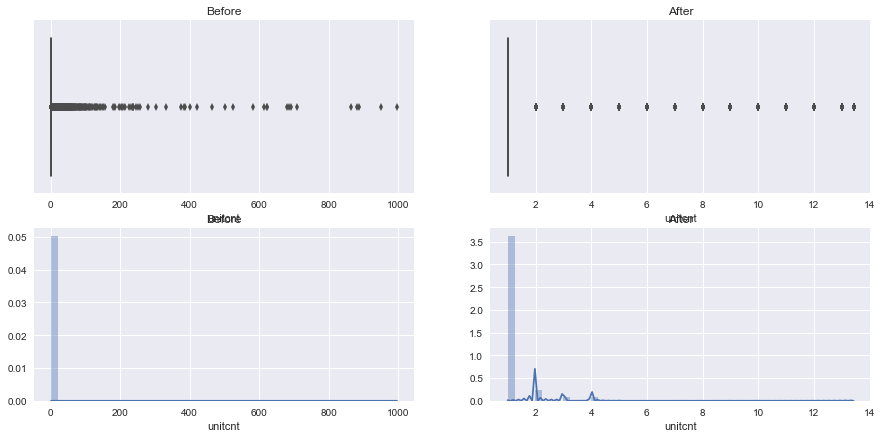

In [42]:
fix_outliers(data, 'unitcnt')

print('Before', data['unitcnt'].unique())
data['unitcnt'] = data['unitcnt'].fillna(1).astype(np.int32)
print('After', data['unitcnt'].unique())

### Variable: pooltypeid2 - Pool with Spa/Hot Tub

Has datatype: nominal and 98.9 percent of values missing 

We replace all missing values with 0 which will represent no Pool with Spa/Hot Tub.

In [43]:
print('Before', data['pooltypeid2'].unique())
data['pooltypeid2'] = data['pooltypeid2'].fillna(0).astype(np.int32)
print('After', data['pooltypeid2'].unique())

Before [ nan   1.]
After [0 1]


### Variable: pooltypeid7 - Pool without hot tub

Has datatype: nominal and 83.6 percent of values missing 

We replace all missing values with 0 which will represent no Pool without hot tub.

In [44]:
print('Before', data['pooltypeid7'].unique())
data['pooltypeid7'] = data['pooltypeid7'].fillna(0).astype(np.int32)
print('After', data['pooltypeid7'].unique())

Before [ nan   1.]
After [0 1]


### Variable: propertycountylandusecode - County land use code i.e. it's zoning at the county level

Has datatype: nominal and 0.02 percent of values missing 

We replace all missing values with 0 which will represent no County land use code.

In [45]:
print('Before', data['propertycountylandusecode'].unique()[:8].tolist() + ['...'])
data['propertycountylandusecode'] = data['propertycountylandusecode'].fillna(0).astype(np.str)
print('After', data['propertycountylandusecode'].unique()[:8].tolist() + ['...'])

Before ['010D', '0109', '1200', '1210', '010V', '300V', '0100', '0200', '...']
After ['010D', '0109', '1200', '1210', '010V', '300V', '0100', '0200', '...']


### Variable: propertylandusetypeid - Type of land use the property is zoned for

Has datatype: nominal and 0 percent of values missing.

We are just changing the datatype to integer

In [46]:
data['propertylandusetypeid'] = data['propertylandusetypeid'].astype(np.int32)

### Variable: propertyzoningdesc - Description of the allowed land uses (zoning) for that property

Has datatype: nominal and 33.4 percent of values missing 

We replace all missing values with 0 which will represent no Description of the allowed land uses.

In [47]:
print('Before', data['propertyzoningdesc'].unique())
data['propertyzoningdesc'] = data['propertyzoningdesc'].fillna(0).astype(np.str)
print('After', data['propertyzoningdesc'].unique())

Before [nan 'LCA11*' 'LAC2' ..., 'WCR1400000' 'EMPYYY' 'RMM2*']
After ['0' 'LCA11*' 'LAC2' ..., 'WCR1400000' 'EMPYYY' 'RMM2*']


### Variable: rawcensustractandblock - Census tract and block ID combined - also contains blockgroup assignment by extension

Has datatype: nominal and 0 percent of values missing 

In [48]:
print('Before', data['rawcensustractandblock'].unique())
data['rawcensustractandblock'] = data['rawcensustractandblock'].fillna(0).astype(np.int32)
print('After', data['rawcensustractandblock'].unique())

Before [ 60378002.041     60378001.011002  60377030.012017 ...,  60590878.032022
  60590626.211013  60379012.091563]
After [60378002 60378001 60377030 ..., 61110057 60375324 60375991]


### Variable: regionidcity - City in which the property is located (if any)

Has datatype: nominal and 1.72 percent of values missing, we will replace any missing values with 0 to represent no city ID

In [49]:
print('Before', data['regionidcity'].unique())
data['regionidcity'] = data['regionidcity'].fillna(0).astype(np.int32)
print('After', data['regionidcity'].unique())

### Variable: regionidcounty - County in which the property is located

Has datatype: nominal and 0 percent of values missing 

In [50]:
print('Before', data['regionidcounty'].unique())
data['regionidcounty'] = data['regionidcounty'].fillna(0).astype(np.int32)
print('After', data['regionidcounty'].unique())

### Variable: regionidneighborhood - City in which the property is located (if any)

Has datatype: nominal and 61.1 percent of values missing 

We replace all missing values with 0 which will represent no region ID neighborhood.

In [51]:
print('Before', data['regionidneighborhood'].unique())
data['regionidneighborhood'] = data['regionidneighborhood'].fillna(0).astype(np.int32)
print('After', data['regionidneighborhood'].unique())

### Variable: regionidzip - Zip code in which the property is located

Has datatype: nominal and 0.08 percent of values missing 

We replace all missing values with 0 which will represent no zip code.

In [52]:
print('Before', data['regionidzip'].unique())
data['regionidzip'] = data['regionidzip'].fillna(0).astype(np.int32)
print('After', data['regionidzip'].unique())

### Variable: roomcnt - Total number of rooms in the principal residence

Has datatype: nominal and 0.001 percent of values missing 

We replace all missing values with 0 which will represent no Total number of rooms in the principal residence reported.

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Before [  0.           8.           4.           5.           7.           6.          11.
   3.          10.           9.           2.          12.          15.67699991
  13.          15.          14.           1.                  nan]
After [ 0  8  4  5  7  6 11  3 10  9  2 12 15 13 14  1]


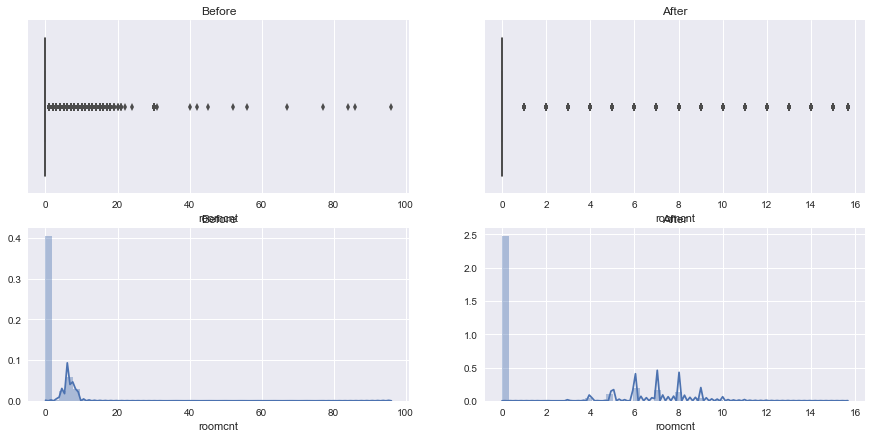

In [53]:
fix_outliers(data, 'roomcnt')

print('Before', data['roomcnt'].unique())
data['roomcnt'] = data['roomcnt'].fillna(0).astype(np.int32)
print('After', data['roomcnt'].unique())

### Variable: storytypeid - Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.). See tab for details.

Has datatype: nominal and 99.9 percent of values missing 

With 99% missing values, we decided to remove this variable.

In [54]:
del data['storytypeid']

### Variable: threequarterbathnbr - Number of 3/4 bathrooms in house (shower + sink + toilet)

Has datatype: ordinal and 89.5 percent of values missing 

We replace all missing values with 0 which will represent no Number of 3/4 bathrooms in house.

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Before [        nan  1.          1.59854253]
After [0 1]


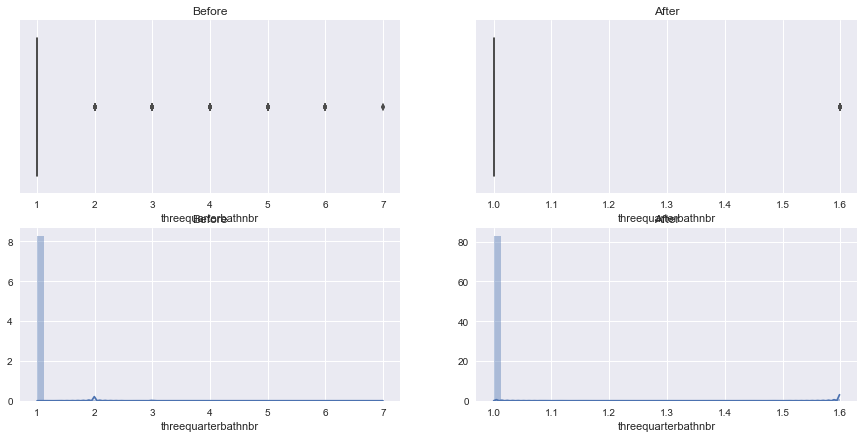

In [55]:
fix_outliers(data, 'threequarterbathnbr')

print('Before', data['threequarterbathnbr'].unique())
data['threequarterbathnbr'] = data['threequarterbathnbr'].fillna(0).astype(np.int32)
print('After', data['threequarterbathnbr'].unique())

### Variable: typeconstructiontypeid - What type of construction material was used to construct the home

Has datatype: nominal and 99.7 percent of values missing 

With 99% missing values, we decided to remove this variable.

In [56]:
del data['typeconstructiontypeid']

### Variable: airconditioningtypeid - Type of cooling system present in the home (if any)
Has datatype: nominal and 72.710860 percent of values missing 

For this variable, missing values indicate the absence of a cooling system.  We replace all missing values with 0 to represent no cooling system.

In [57]:
print('Before', data['airconditioningtypeid'].unique())
data['airconditioningtypeid'] = data['airconditioningtypeid'].fillna(0).astype(np.int32)
print('After', data['airconditioningtypeid'].unique())

Before [ nan   1.  13.   5.  11.   9.  12.   3.]
After [ 0  1 13  5 11  9 12  3]


### Variable: architecturalstyletypeid - Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
Has datatype: nominal and 99.796185 percent of values missing 

Architectural style describes the home design. As such, it is not something we can extrapolate a value for. With over 99% of values missing, we decided to eliminate this variable.

In [58]:
del data['architecturalstyletypeid']

### Variable: basementsqft - Finished living area below or partially below ground level
Has datatype: ratio and 99.945255 percent of values missing

Basements are not standard home features. Whenever a basement is not a feature of the home, the value for area was entered as a missing value. With over 99% of values missing, we decided to eliminate this variable.

In [59]:
del data['basementsqft'] 

### Variable: bathroomcnt - Number of bathrooms in home including fractional bathrooms
Has datatype: ordinal and 0.000841 percent of values missing

We decided it is potentially possible for the property to not have a bathroom so we decided to replace missing values with zeros since there are only very few. 


In [60]:
print('Before', data['bathroomcnt'].unique())
data['bathroomcnt'] = data['bathroomcnt'].fillna(0).astype(np.int32)
print('After', data['bathroomcnt'].unique())

Before [  0.     2.     4.     3.     1.     2.5    3.5    5.     1.5    4.5    7.5
   5.5    6.     7.    10.     8.     9.    12.    11.     8.5    6.5   13.
   9.5   14.    20.    19.5   15.    10.5     nan  18.    16.     1.75  17.
  19.     0.5   12.5   11.5   14.5 ]
After [ 0  2  4  3  1  5  7  6 10  8  9 12 11 13 14 20 19 15 18 16 17]


### Variable: bedroomcnt - Number of bedrooms in home
Has datatype: ordinal and 0.000437 percent of values missing

We decided to replace missing values with zeros since there are only very few to represent a studio apartment. 

In [61]:
print('Before', data['bedroomcnt'].unique())
data['bedroomcnt'] = data['bedroomcnt'].fillna(0).astype(np.int32)
print('After', data['bedroomcnt'].unique())

Before [  0.   4.   5.   2.   3.   1.   6.   7.   8.  12.  11.   9.  10.  14.  16.
  13.  nan  15.  17.  18.  20.  19.]
After [ 0  4  5  2  3  1  6  7  8 12 11  9 10 14 16 13 15 17 18 20 19]


### Variable: buildingclasstypeid - The building framing type (steel frame, wood frame, concrete/brick)
Has datatype: nominal and 99.576949 percent of values missing

With this much missing values and the difficulty of assigning a building framing type, we deceided to remove this variable.

In [62]:
del data['buildingclasstypeid']

### Variable: buildingqualitytypeid - Overall assessment of condition of the building from best (lowest) to worst (highest)
Has datatype: ordinal and 34.81 percent of values missing

We chose to replace the missing values with the median of the condition assessment instead of giving the missing values the best or worst value.

In [63]:
print('Before', data['buildingqualitytypeid'].unique())
medianQuality = data['buildingqualitytypeid'].median()
data['buildingqualitytypeid'] = data['buildingqualitytypeid'].fillna(medianQuality).astype(np.int32)
print('After', data['buildingqualitytypeid'].unique())

Before [ nan   7.   4.  10.   1.  12.   8.   3.   6.   9.   5.  11.   2.]
After [ 7  4 10  1 12  8  3  6  9  5 11  2]


### Variable: calculatedbathnbr - Number of bathrooms in home including fractional bathroom
Has datatype: ordinal and 3.95 percent of values missing

With a low number of missing values, we decided to assign 0 to all missing values since we decided above it is possible that a property could have 0 bathrooms.

In [64]:
print('Before', data['calculatedbathnbr'].unique())
data['calculatedbathnbr'] = data['calculatedbathnbr'].fillna(0).astype(np.int32)
print('After', data['calculatedbathnbr'].unique())

Before [  nan   2.    4.    3.    1.    2.5   3.5   5.    1.5   4.5   7.5   5.5
   6.    7.   10.    8.    9.   12.   11.    8.5   6.5  13.    9.5  14.
  20.   19.5  15.   10.5  18.   16.   17.   19.   12.5  11.5  14.5]
After [ 0  2  4  3  1  5  7  6 10  8  9 12 11 13 14 20 19 15 18 16 17]


### Variable: decktypeid - Type of deck (if any) present on parcel
Has datatype: nominal and 99.427311 percent of values missing

Missing values is most likely an indication of an absence of this feature in the property. With 99% missing values, we will remove this column.

In [65]:
del data['decktypeid']

### Variable: finishedfloor1squarefeet - Size of the finished living area on the first (entry) floor of the home
Has datatype: ratio and 93.18 percent of values missing

Having this much missing values and the availability of an alternate variable - calculatedfinishedsquarefeet - with very few missing values, we decided to eliminate this variable.

In [66]:
del data['finishedfloor1squarefeet']

### Variable: calculatedfinishedsquarefeet - Calculated total finished living area of the home
Has datatype: ratio and 1.48 percent of values missing

These missing values appear to be consistent with 0 or missing values for variables associated with a building or structure on the proeprty such as bathroomcnt, bedroomcnt, or architecturalstyletypeid. We can assume that no structures exist on these properties and we decided to impute zeros to these.

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Before [            nan  10925.92657277   5068.         ...,   7588.           8545.
   7342.        ]
After [    0 10925  5068 ...,  7588  8545  7342]


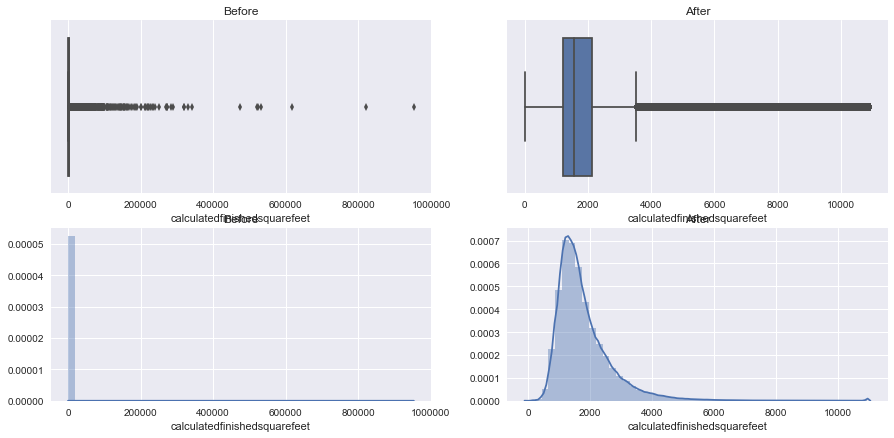

In [67]:
fix_outliers(data, 'calculatedfinishedsquarefeet')

print('Before', data['calculatedfinishedsquarefeet'].unique())
data['calculatedfinishedsquarefeet'] = data['calculatedfinishedsquarefeet'].fillna(0).astype(np.int32)
print('After', data['calculatedfinishedsquarefeet'].unique())

### Variable: finishedsquarefeet6 - Base unfinished and finished area
Has datatype: ratio and 99.26 percent of values missing

With 99% missing values, we decided to delete this variable.

In [68]:
del data['finishedsquarefeet6']

### Variable: finishedsquarefeet13 - Finished living area
Has datatype: ratio and 99.743000 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Since there are 99% missing values we will remove this from the dataset.

In [69]:
del data['finishedsquarefeet13']

### Variable: finishedsquarefeet12 - Finished living area
Has datatype: ratio and 8.89 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Missing values are therefore zeros.

Outliers found!


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Before [   nan  4000.  3633. ...,   317.   268.   161.]
After [   0 4000 3633 ...,  317  268  161]


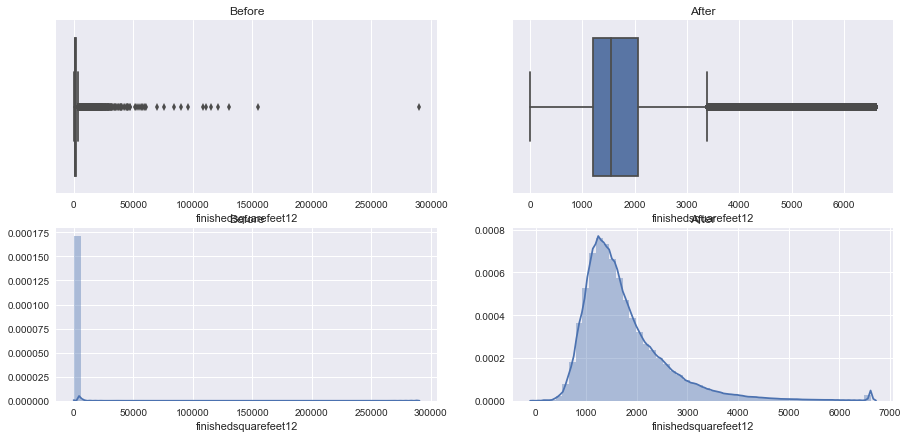

In [70]:
fix_outliers(data, 'finishedsquarefeet12')


print('Before', data['finishedsquarefeet12'].unique())
data['finishedsquarefeet12'] = data['finishedsquarefeet12'].fillna(0).astype(np.int32)
print('After', data['finishedsquarefeet12'].unique())

### Variable: finishedsquarefeet15 - Finished living area
Has datatype: ratio and 93.58 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Since there are 93% missing values we will remove this from the dataset.

In [71]:
del data['finishedsquarefeet15']

### Variable: finishedsquarefeet50 - Finished living area
Has datatype: ratio and 93.18 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Since there are 93% missing values we will remove this from the dataset.

In [72]:
del data['finishedsquarefeet50']

# Simple Statistics
<b>10 points</b>

<i>
<b>Description:</b><br/>
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 
</i>

<b>Answer:</b><br/>
...

In [73]:
train_data = data[~data['logerror'].isnull()]

continous_vars = variables[variables['type'].isin(['ratio', 'interval'])].index
continous_vars = continous_vars[continous_vars.isin(data.columns)]
continous_vars = continous_vars[~continous_vars.isin(['longitude', 'latitude'])]

print(continous_vars)

Index(['calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'garagetotalsqft', 'lotsizesquarefeet', 'poolsizesum',
       'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'taxvaluedollarcnt', 'structuretaxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'assessmentyear',
       'taxdelinquencyyear'],
      dtype='object', name='name')


In [124]:
output_table = data[continous_vars].describe().T

# TODO: Inner join mode and range to the table

In [125]:
mode_range = data[continous_vars].mode().T
mode_range.columns = ['mode']
mode_range['range'] = data[continous_vars].max() - data[continous_vars].min()
output_table = output_table.join(mode_range)
output_table.astype(int)

,count,mean,std,min,25%,50%,75%,max,mode,range
calculatedfinishedsquarefeet,2973905,1784,984,0,1199,1561,2124,10925,0,10925
finishedsquarefeet12,2973905,1596,958,0,1092,1466,1996,6615,0,6615
garagetotalsqft,2973905,113,217,0,0,0,0,1610,0,1610
lotsizesquarefeet,2973905,19810,73796,0,5200,6700,9243,1710750,0,1710750
poolsizesum,2973905,90,196,0,0,0,0,1476,0,1476
yardbuildingsqft17,2973905,8,61,0,0,0,0,1485,0,1485
yardbuildingsqft26,2973905,0,12,0,0,0,0,2126,0,2126
yearbuilt,2973905,1964,23,1801,1950,1963,1981,2015,1963,214
taxvaluedollarcnt,2973905,407695,429374,1,181179,306086,485000,4052186,306086,4052185
structuretaxvaluedollarcnt,2973905,166367,179850,1,75440,122590,195143,2181198,122590,2181197


In [130]:
bin_vars = ['hashottuborspa', 'hashottuborspa']

bin_data = data[bin_vars]
result_table = bin_data.mean() * 100
pd.DataFrame(result_table, columns=['Percent is 1'])

,Percent is 1
hashottuborspa,2.32072
hashottuborspa,2.32072


## Visualizing the continuous variables

From the continuous variables above, we can immediately see that 0 is the most common value for many of the variables.  To explore further, we chose to visualize each variable that had 25% to 75% values in the form of a boxplot and histogram.

## Calculated finished square feet
For calculated square feet, most values were 0 with a range from 0 to 10898 sqft.  Note that we removed outliers earlier while cleaning the data.  The median of 1561 was a little smaller than the mean of 1784 so we expect to see a slight right skew, which we do below.  What is interesting here is the peak at 0 of values and then another peak around 1600 to 1800.  We continue to have few properties with very large (higher than the 75th percentile of 2124) which is fairly normal for any area to have the middle class homes with few larger homes mixed in.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


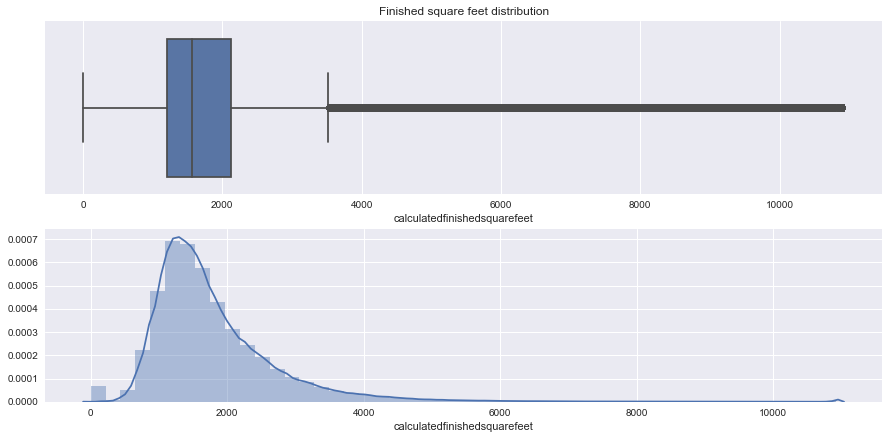

In [77]:
f, (ax0,ax2) = plt.subplots(nrows=2, ncols=1, figsize=[15, 7])
sns.boxplot(data['calculatedfinishedsquarefeet'].dropna(), ax=ax0).set_title('Finished square feet distribution');
sns.distplot(data['calculatedfinishedsquarefeet'].dropna(), ax=ax2);

## Finished living area
Similar to calculated finished square feet, finished living area had outliers which we already fixed above.  The range for finished living area is 0 to 6871 with 0 being the mode of the data.  The mean (1596) is about 100sqft larger than the median (1466) so they are relatively the same since the variance is 962.

This variable is bimodal in with a large spike at 0 and another peak with a fairly normal distribution and long right tail at around 1400.

We also see a slight spike at the very end of the tail of the dataset.  This means there were a lot of outliers that were set to the maximum (mean + 6 * std).

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


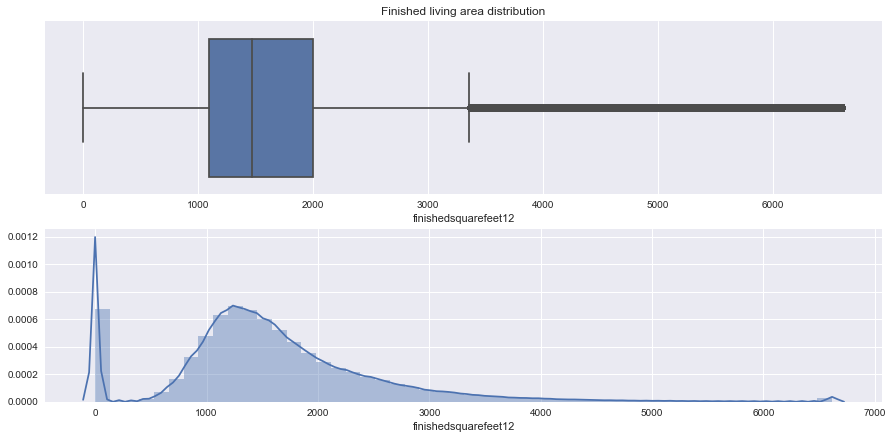

In [78]:
f, (ax0,ax2) = plt.subplots(nrows=2, ncols=1, figsize=[15, 7])
sns.boxplot(data['finishedsquarefeet12'].dropna(), ax=ax0).set_title('Finished living area distribution');
sns.distplot(data['finishedsquarefeet12'].dropna(), ax=ax2);

## Lot size square feet
Lot size square feet has the largest range from 0 to 1,710,750 even after removing all outliers (mean + std * 6).  The mode for this variable is 0 so we see below a spike at 0 and a very long right tail.

What is interesting with this variable is the large variance of 73796. The 25th to 75th percentile values are 5200 and 9243 respectively so we will skipped over the box plot and plotted the histogram below.

In the histogram, we see a right skewed distribution which makes sense considering the mean is 19810 and the median is 6700 - agian, with such a large variance it is difficult for the eye to see the difference.  The main takeaway here is the large number of 0s.  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


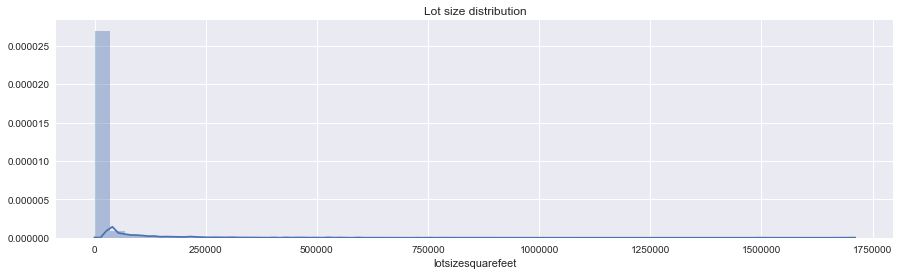

In [79]:
f, (ax0) = plt.subplots(nrows=1, ncols=1, figsize=[15, 4])
sns.distplot(data['lotsizesquarefeet'].dropna(), ax=ax0).set_title('Lot size distribution');

## Year Built
The year the properties were built ranges from 1801 to 2015.  The mode and median of 1963 is only a year difference from the mean of 1964.  The distribution seems to be fairly normal with the peak in the early 1960s and dropping off on both sides.  We see a number of homes that were built before 1905 (the low whisker of the boxplot) which gives us a long left tail.  

We see a few other spikes in homes built which could correlate to a number of other factors such as healthy economic growth, politcal backing on mortgages, or rises in population.  The baby boomers born early 1960 shows many houses being built and around the time they turned 18 more houses seem to have been built.   We see an apparent fall right before 2000 which could be the dot com burst and another drop in the housing burst of 2007. Because our data was collected in 2016, we expect to see fewer homes built the previous year.

What will be interesting with this variable is how old a home has to be to begin to "fall apart" or need major renovations to the piping or foundation.  Will a home built in a certain year have many homes made from a faulty material that causes damages later on?  Will the Zestimate take into account the disclosures of a home that each sale price typically does?

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


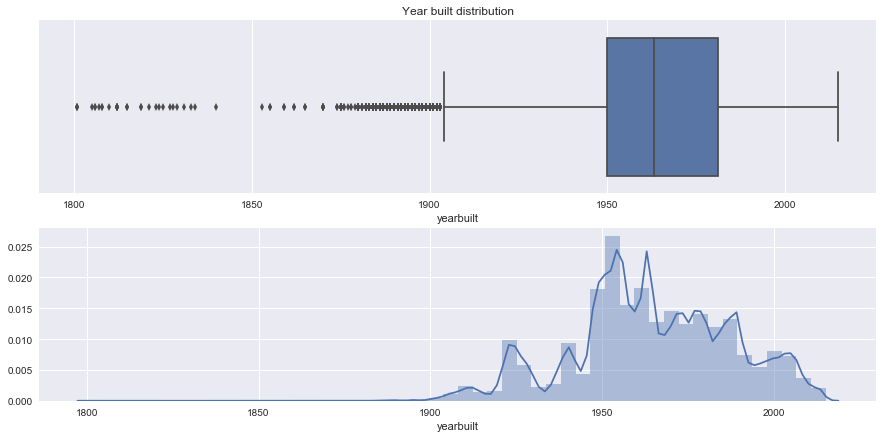

In [80]:
f, (ax0,ax2) = plt.subplots(nrows=2, ncols=1, figsize=[15, 7])
sns.boxplot(data['yearbuilt'].dropna(), ax=ax0).set_title('Year built distribution');
sns.distplot(data['yearbuilt'].dropna(), ax=ax2);

## Total tax value
The total tax value of the property ranges from 1 to 4,052,186.  The median of 306,086 is the same as the mode and a little smaller than the mean of 407,695 which is evident in the right skewed distribution below.  These values have already been adjusted for outliers which is why we see a slight spike at the maximum value for larger developments and unique mansions.

The distribution is fairly similar to square feet above because the tax is calculated by value assessed * square feet. What is interesting to note here is the missing values for tax were replaced by the median (hence the median and mode being the same) where the square footage missing values were replaced with 0s (hence the 0 as the mode and second peak in the distribution).

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


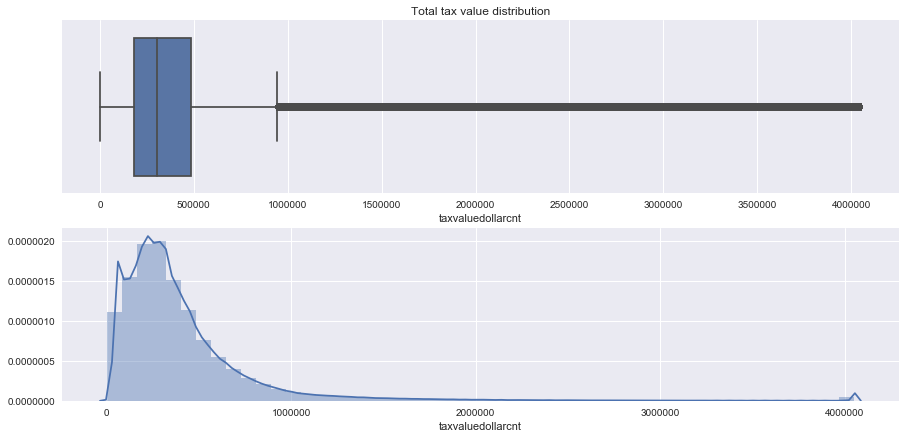

In [81]:
f, (ax0,ax2) = plt.subplots(nrows=2, ncols=1, figsize=[15, 7])
sns.boxplot(data['taxvaluedollarcnt'].dropna(), ax=ax0).set_title('Total tax value distribution');
sns.distplot(data['taxvaluedollarcnt'].dropna(), ax=ax2);

## Building and land tax
The building or structure tax has a similar right skewed distribution as total tax.  The values range from 1 to 2,165,929, already adjusted for outliers and cleaned up with missing values set to median.  That being said, the median and mode are the same at 122,590 which is lower than the mean of 166,344.

The land tax values range from 1 to 2,477,536, also adjusted for outliers and cleaned up with missing values set to median.  Because of this, the median and mode are the same at 167,043 which is lower than the mean of 242,391.

Land tax seems to have a larger range of values from the 25th to 75th percentile than the building tax.  This means that the land is valued at a greater variance (287k) than the buildings in certain areas (variance of 179k). We think this could be due to location itself as better neighborhoods, safer areas, or better schools could result in a higher assessment than other locations, thus widening the variance.  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


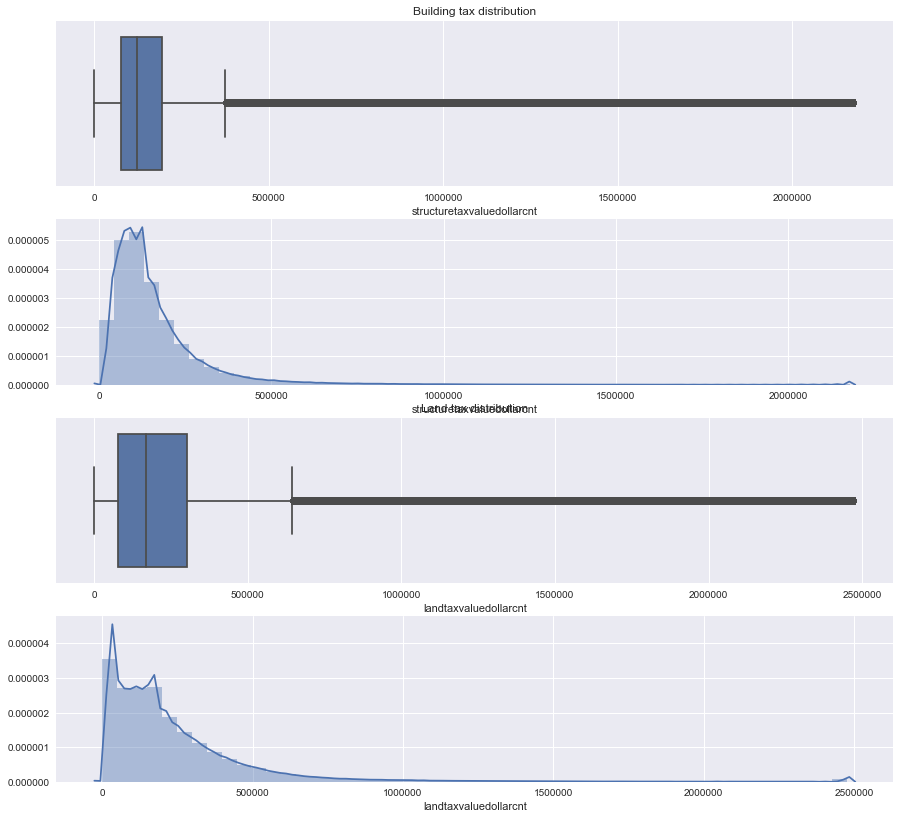

In [82]:
f, (ax0,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=[15, 14])
sns.boxplot(data['structuretaxvaluedollarcnt'].dropna(), ax=ax0).set_title('Building tax distribution');
sns.distplot(data['structuretaxvaluedollarcnt'].dropna(), ax=ax2);
sns.boxplot(data['landtaxvaluedollarcnt'].dropna(), ax=ax3).set_title('Land tax distribution');
sns.distplot(data['landtaxvaluedollarcnt'].dropna(), ax=ax4);

## Assessment year
Assessment year is the year that the property was assessed.  The 25th through 75th percentile of values are all from the year 2015 so reading a box plot is not very helpful.  Instead we list out the unique values for assessment year along with our histogram.

In the state of California, the base year value is set when you originally purchase the property, based on the sales price listed on the deed.  However, there are exceptions which is why we see a few assessment years from 2000 to 2016 thrown in.

In order for assessment year to be useful for our predictions, we should find out what each exception is and what the cause of it not to be assessed at the point of sale.  This could affect the predicted log error.

Unique assessment years:  [2015 2014 2003 2012 2001 2011 2013 2016 2010 2004 2005 2002 2000 2009]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


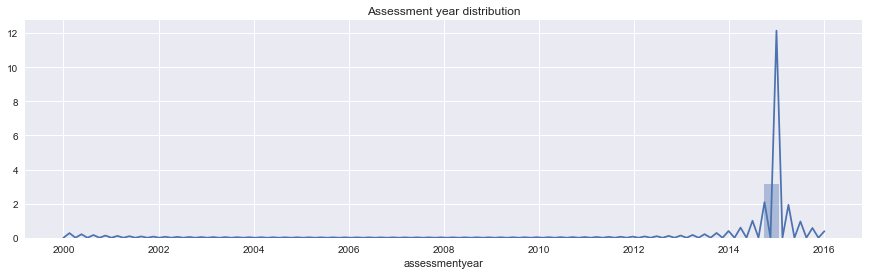

In [83]:
print('Unique assessment years: ', data['assessmentyear'].unique())
f, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=[15, 4])
sns.distplot(data['assessmentyear'].dropna(), ax=ax2).set_title('Assessment year distribution');

# Visualize Attributes
<b>15 points</b>

<i>
<b>Description:</b><br/>
Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.
</i>

<b>Answer:</b><br/>
...

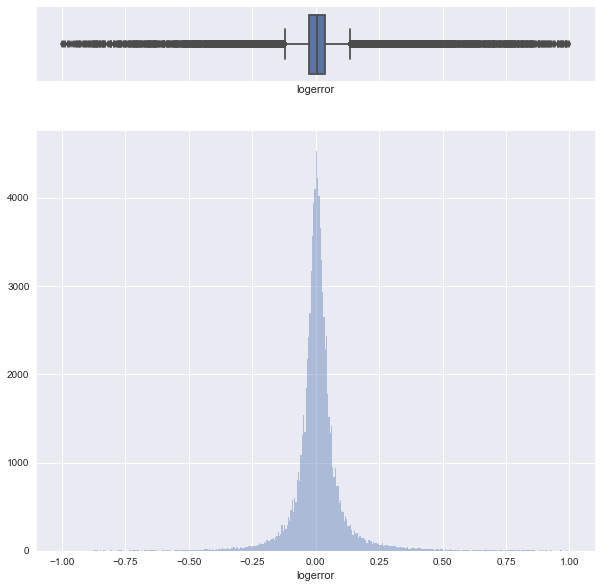

In [84]:
train_data = data[~data['logerror'].isnull()]

#sns.distplot(train_data['logerror'][train_data['logerror'].abs()<1])

x = train_data['logerror']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
    gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 10))
sns.boxplot(train_data['logerror'][train_data['logerror'].abs()<1], ax=ax_box)
sns.distplot(train_data['logerror'][train_data['logerror'].abs()<1], ax=ax_hist, bins=400, kde=False)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

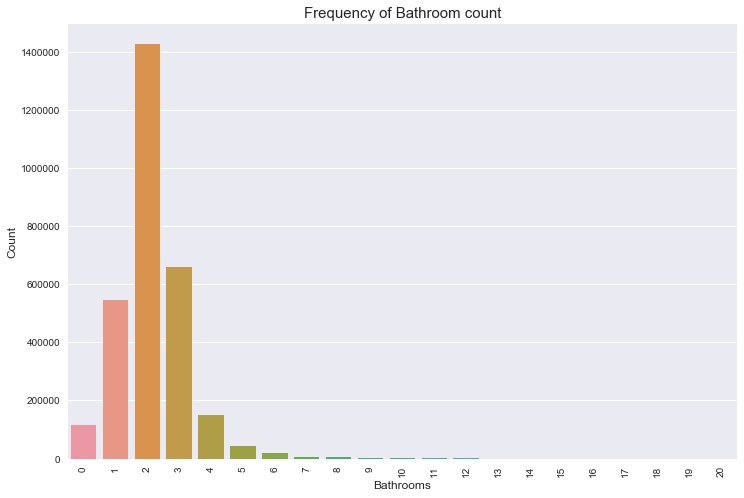

In [87]:
plt.figure(figsize=(12,8))
sns.countplot(data['bathroomcnt'])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathrooms', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)

# Explore Joint Attributes
<b>15 points</b>

<i>
<b>Description:</b><br/>
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.
</i>

<b>Answer:</b><br/>
...

In [98]:
train_data['transactiondate'] = pd.to_datetime(train_data['transactiondate'])

c:\users\yao\documents\github\ipykernel\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


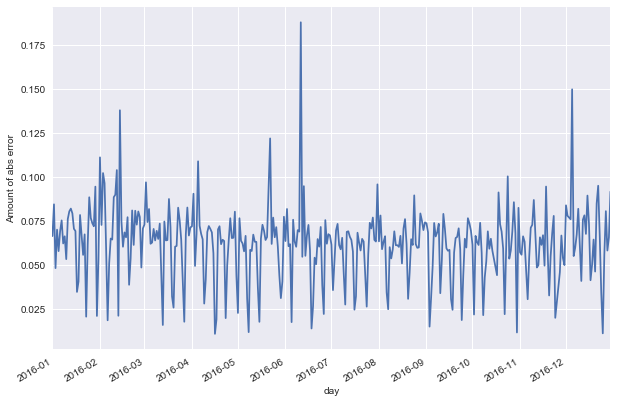

In [106]:
train_data = data[~data['logerror'].isnull()]

error_per_day = train_data['logerror'].abs().groupby(train_data['transactiondate']).mean()
error_per_day.plot()
plt.ylabel('Amount of abs error', fontsize=10)
plt.xlabel('day', fontsize=10)

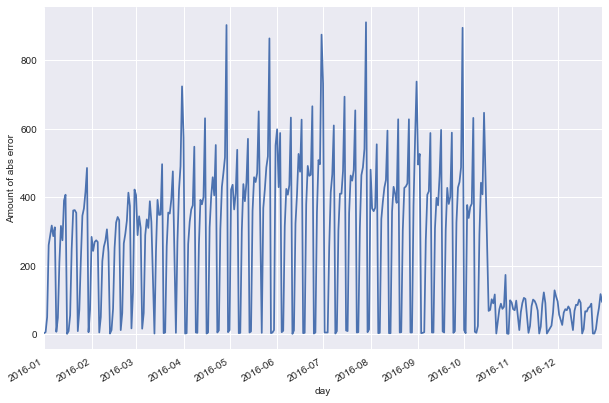

In [107]:
error_per_day = train_data['logerror'].groupby(train_data['transactiondate']).count()
error_per_day.plot()
plt.ylabel('Number of transactionss', fontsize=10)
plt.xlabel('day', fontsize=10)

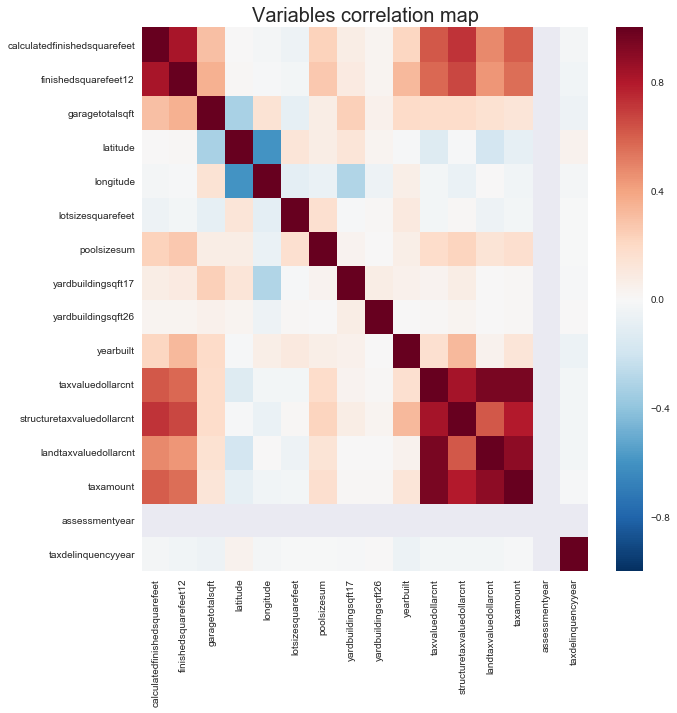

In [88]:
train_data = data[~data['logerror'].isnull()]

continious_vars = variables[variables['type'].isin(['ratio', 'interval'])].index
continious_vars = continious_vars[continious_vars.isin(data.columns)]

corrs = train_data[continious_vars].corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrs, ax=ax)
plt.title("Variables correlation map", fontsize=20)

In [89]:
#from pandas.plotting import scatter_matrix
#ax = scatter_matrix(data,figsize=(15, 10))



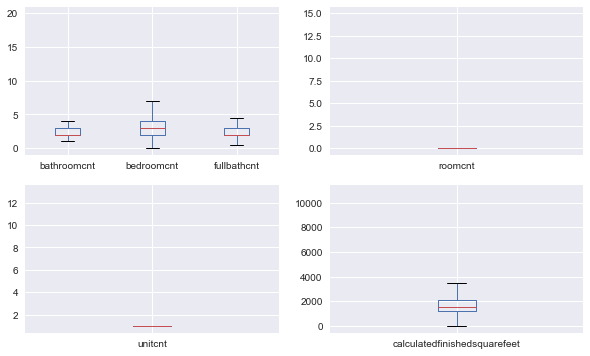

In [90]:

vars_to_plot_separate = [['bathroomcnt','bedroomcnt','fullbathcnt'],
                         ['roomcnt'],
                         ['unitcnt'],
                         ['calculatedfinishedsquarefeet'] ]
plt.figure(figsize=(10, 6))

for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.subplot(len(vars_to_plot_separate)/2, 
                2, 
                index+1)
    ax = data.boxplot(column=plot_vars)
    
plt.show()


# Explore Attributes and Class
<b>10 points</b>

<i>
<b>Description:</b><br/>
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).
</i>

<b>Answer:</b><br/>
...

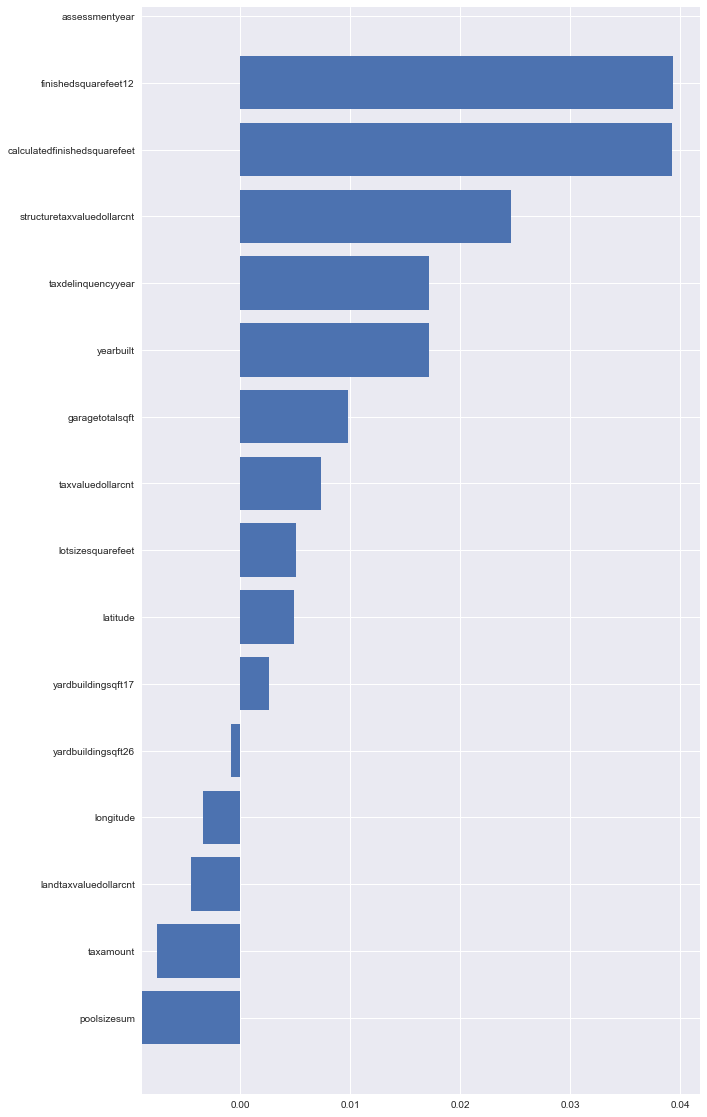

In [91]:
train_data = data[~data['logerror'].isnull()]

continious_vars = variables[variables['type'].isin(['ratio', 'interval'])].index
continious_vars = continious_vars[continious_vars.isin(data.columns)]

labels = []
values = []
for column in continious_vars:
    labels.append(column)
    values.append(train_data[column].corr(train_data['logerror']))
    
corr = pd.DataFrame({'labels':labels, 'values':values})
corr = corr.sort_values(by='values')
labels = corr['labels'].values
values = corr['values'].values

fig, ax = plt.subplots(figsize=(10,20))
ax.set_yticks(range(len(labels)))
plt.barh(range(len(labels)), values)
#ax = plt.gca()
ax.set_yticklabels(labels, rotation='horizontal');


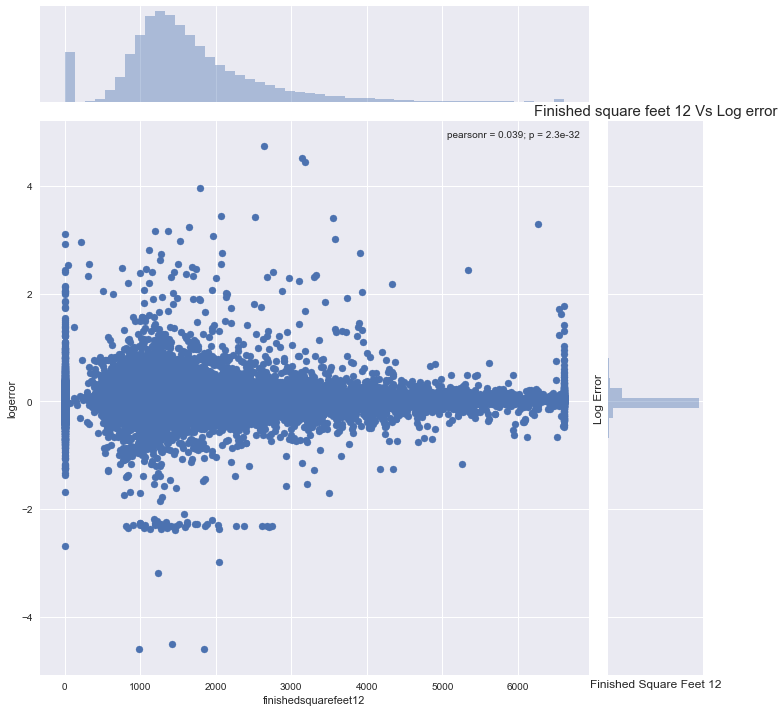

In [92]:
column = "finishedsquarefeet12"
train_data = data[~data['logerror'].isnull()]


sns.jointplot(train_data[column], train_data['logerror'], size=10)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)

# New Features
<b>5 points</b>

<i>
<b>Description:</b><br/>
Are there other features that could be added to the data or created from existing features? Which ones?
</i>

<b>Answer:</b><br/>
...

# This is work in progress ...

Name	Type	Description
Zipcode	Text	5 digit Zipcode or military postal code(FPO/APO)
ZipCodeType	Text	Standard, PO BOX Only, Unique, Military(implies APO or FPO)
City	Text	USPS offical city name(s)
State	Text	USPS offical state, territory, or quasi-state (AA, AE, AP) abbreviation code
LocationType	Text	Primary, Acceptable,Not Acceptable
Lat	Double	Decimal Latitude, if available
Long	Double	Decimal Longitude, if available
Location	Text	Standard Display  (eg Phoenix, AZ ; Pago Pago, AS ; Melbourne, AU )
Decommisioned	Text	If Primary location, Yes implies historical Zipcode, No Implies current Zipcode; If not Primary, Yes implies Historical Placename
TaxReturnsFiled	Long Integer	Number of Individual Tax Returns Filed in 2008
EstimatedPopulation	Long Integer	Tax returns filed + Married filing jointly + Dependents
TotalWages	Long Integer	Total of Wages Salaries and Tips

In [93]:
# http://federalgovernmentzipcodes.us
zips = pd.read_csv('../input/free-zipcode-database.csv')
zips = zips[['Zipcode','ZipCodeType','City','State','LocationType']]

assert np.all(~zips.isnull())

zips = zips.rename(columns={'Zipcode':'regionidzip'})

data['regionidzip'] = data['regionidzip'].fillna(0).astype(np.int32)
data = pd.merge(data, zips, how='left', on='regionidzip')

FileNotFoundError: File b'../input/free-zipcode-database.csv' does not exist

# Exceptional Work
<b>10 points</b>

<i>
<b>Description:</b><br/>
You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.
</i>

<b>Answer:</b><br/>

TODO:
- plot of a heat map
- analysis of feature importance
- a model